In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
#display(login_times) 
#data

In [2]:
# convert time string to timestamps
from datetime import datetime as dt
timestamps=[dt.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]
# timestamps

In [3]:
# convert time string to data frame
df = pd.DataFrame(login_times, columns=['string']) # create first column (main column)
df

,string
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [14]:
# Creating every column due to needed information
df['year'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').year)
df['month'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').month)
df['day'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').day)
df['hour'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').hour)
df['minute'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').minute)
df['second'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').second)
df['weekday'] = df['string'].apply(lambda row:dt.strptime(row, '%Y-%m-%d %H:%M:%S').weekday())

df.head()

,string,year,month,day,hour,minute,second,weekday
0,1970-01-01 20:13:18,1970,1,1,20,13,18,3
1,1970-01-01 20:16:10,1970,1,1,20,16,10,3
2,1970-01-01 20:16:37,1970,1,1,20,16,37,3
3,1970-01-01 20:16:36,1970,1,1,20,16,36,3
4,1970-01-01 20:26:21,1970,1,1,20,26,21,3


# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? It converts string format to timestamp format.

B- What does the concept of "timestamp" mean? What are its type and unit? Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.
Type: DateTime

C- Is the variable "timestamps" a list or a numpy array? It's a list.

D- Which day of week (Sunday, Monday, ...) is 1970-01-01? Thursday

E- Which function can convert a timestamp back to datetime? parse_dates()


In [5]:
# Question D
d = pd.Timestamp('1970-01-01')
print(d.day_name())

Thursday


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

## Problem 1 Solution:

In [6]:
day_number=np.array(timestamps).astype(int)//(24*60*60) # list all days
counts = np.unique(day_number) # make a list of all unique days

print(str(len(counts)) + " unique days are in the data.")

103 unique days are in the data.


## Problem 2 Solution:

In [7]:
day_number=np.array(timestamps).astype(int)//(24*60*60) # find day number for all requests
unique, counts = np.unique(day_number, return_counts=True) # find how many requests are in each day
maxday=np.argmax(counts) # find the day with the maximum requests

print("the busiest day is day number",unique[maxday])

the busiest day is day number 92


## Problem 3 Solution:

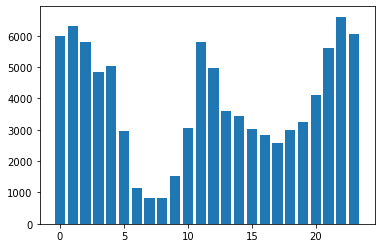

22


In [8]:
df_temp_01 = df.hour.value_counts(normalize=False) # counts every hour due to their index
plt.bar(df_temp_01.index, df_temp_01.values)
plt.show()
print("22")

## Problem 4 Solution:

In [9]:
def same_time(time_list): # iterate and find the repeated request
    
    for i in range(len(time_list)-1):
        
        if time_list[i] == time_list[i+1]:
            return True
        
    return False

if same_time(timestamps):
    print('There are some requests that happened at the same time.')
else:
    print("""There aren't any requests that happened at the same time""")

There are some requests that happened at the same time.


## Problem 5 Solution:

In [10]:
def find_gap(gap_list): # list all gaps
    
    result = []
    
    for i in range(len(gap_list)-1):
        
        result.append(gap_list[i+1] - gap_list[i])
        
    return result

arr = np.array(find_gap(timestamps))

print('The longest gap between two request is ' + str(arr.argmax()) + " seconds.") # print the longest gap

The longest gap between two request is 4401 seconds.


## Problem 6 Solution:

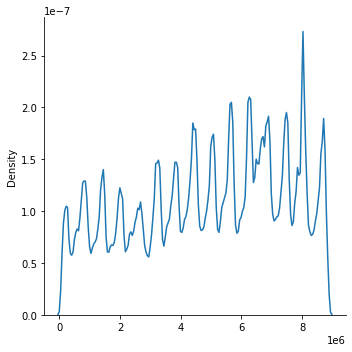

In [11]:
import seaborn as sns

sns.displot(timestamps, kind='kde', bw_adjust=0.15)

In [12]:
print('The number of requests increases overtime.') # you can see from plot

The number of requests increases overtime.


## Problem 7 Solution:

## Problem 8 Solution:

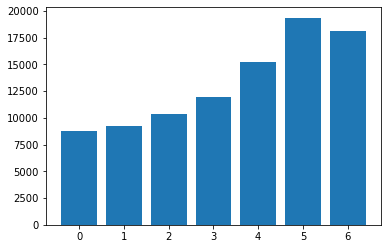

Friday is the busiest day of the week.


In [13]:
df_temp_02 = df.weekday.value_counts(normalize=False) # counts every request due to their day
plt.bar(df_temp_02.index, df_temp_02.values)
plt.show()
print("Friday is the busiest day of the week.")

## Problem 9 Solution:

## Problem 10 Solution: